Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - accuracy: 0.2713 - loss: 1.9635 - val_accuracy: 0.4403 - val_loss: 1.5666
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - accuracy: 0.4397 - loss: 1.5422 - val_accuracy: 0.4763 - val_loss: 1.4503
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - accuracy: 0.4819 - loss: 1.4460 - val_accuracy: 0.5010 - val_loss: 1.3876
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - accuracy: 0.5089 - loss: 1.3735 - val_accuracy: 0.5249 - val_loss: 1.3399
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - accuracy: 0.5327 - loss: 1.3191 - val_accuracy: 0.5416 - val_loss: 1.3071
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - accuracy: 0.5530 - loss: 1.2676 - val_accuracy: 0.5380 - val_loss: 1.3125
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - accuracy: 0.5705 - loss: 1.2161 - val_accuracy: 0.5539 - val_loss: 1.2753
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - accuracy: 0.5796 - loss: 1.1893 - val_acc

Enter index(0 to 9999) for test image: 500


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


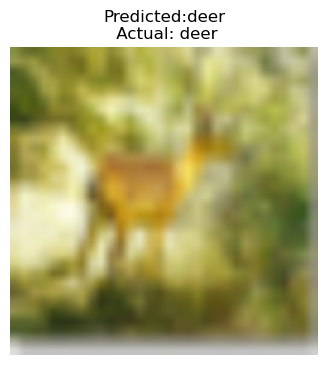

In [16]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
(x_train,y_train), (x_test, y_test)= tf.keras.datasets.cifar10.load_data()
x_train = x_train.astype('float32') /255.0
x_test = x_test.astype('float32') /255.0
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test =  tf.keras.utils.to_categorical(y_test, 10)

model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(32,(3,3), activation = 'relu', input_shape=(32,32,3)))
model.add(tf.keras.layers.MaxPooling2D((2,2)))
model.add(tf.keras.layers.Conv2D(4,(3,3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D((2,2)))
model.add(tf.keras.layers.Conv2D(64,(3,3), activation= 'relu'))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(64,activation= 'relu'))
model.add(tf.keras.layers.Dense(10, activation= 'softmax'))
model.compile(optimizer='adam', loss ='categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=10,batch_size=64, validation_split=0.2)
class_names= ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog','horse', 'ship', 'truck']
index=int(input("Enter index(0 to 9999) for test image:"))
if index < 0 or index >= len(x_test):
    print("Invalid index using index 0 by default")
    index=0
test_image = x_test[index]
true_label = np.argmax(y_test[index])
prediction = model.predict(np.expand_dims(test_image,axis=0))
predicted_label =np.argmax(prediction)
plt.figure(figsize=(4,4))
resized_image = tf.image.resize(test_image,[128,128])
plt.imshow(resized_image)
plt.axis('off')
plt.title(f"Predicted:{class_names[predicted_label]}\n Actual: {class_names[true_label]}")
plt.show()




